Instituto Politécnico Nacional

Centro de Investigación en Computación

Minería de datos I

Materialización del cubo de datos de los datos de trayectorias de aves marinas

Presenta: Ana Maritza Bello

---

# Materialización del cubo de datos

5.a "Implementing Data Cubes efficiently"

## Algoritmo de Harinarayan

Problema: Escoger _k_ vistas de un conjunto de _n_ vistas que minimicen el costo
de materializar el cubo de datos.

Objetivo: Minimizar el costo de materializar el cubo de datos.

Este es un problema NP-completo, por lo tanto no existe un algoritmo que lo
resuelva en tiempo polinomial. Sin embargo, existen algoritmos que lo resuelven
en tiempo exponencial. El algoritmo de Harinarayan es uno de ellos, el cual es
un algoritmo voraz que utiliza una heurística para escoger las _k_ vistas que
minimizan el costo de materializar el cubo de datos.

El primer paso es estimar el costo de materializar el cubo de datos para cada
una de las vistas. Para esto, se utiliza la siguiente fórmula: 

$$ C_{v} = \sum_{i=1}^{n} \frac{1}{\prod_{j=1}^{m} \frac{1}{f_{ij}}} $$

Donde: 
- $C_{v}$ es el costo de materializar la vista $v$.
- $n$ es el número de dimensiones.
- $m$ es el número de niveles de agregación.
- $f_{ij}$ es el número de tuplas en el nivel de agregación $j$ de la dimensión
  $i$.

El segundo paso es escoger las _k_ vistas que minimicen el costo de materializar
el cubo de datos. Para esto, se utiliza la siguiente heurística:

1. Se escoge la vista con el menor costo de materializar el cubo de datos.
2. Se escoge la vista con el menor costo de materializar el cubo de datos
   excluyendo la vista escogida en el paso 1.
3. Se escoge la vista con el menor costo de materializar el cubo de datos
    excluyendo las vistas escogidas en los pasos 1 y 2.
4. Se repite el paso 3 hasta escoger las _k_ vistas.


# Desarrollo

El dataframe de entrada a este algoritmo se definió de la siguiente manera:

El nombre de la vista del cuboide base es `view_3D_iys`, donde `i` es el id del
ave, y `y` es el año de la observación y `s` es la temporada reproductiva del
ave.

Las siguientes vistas se definen cambiando en el nombre el nivel de la dimensión
y "prendiendo" y "apagando" las dimensiones. Por ejemplo, la vista
`view_2D_110`, corresponde a la vista de id, año y ;a temporada reproductiva
está apagada.

En el dataframe también se incluye el costo de materializar cada vista, el cual
se calculó utilizando como tal el número de tuplas generadas por cada vista.

También se incluuye el tiempo que tardó la consulta en ejecutarse.

La columna `n_children`, se refiere al número de vistas que dependen de la vista
en cuestión.

La columna `level`, se refiere al nivel de la dimensión que está prendida en la
vista.

La columna `dependencies` se refiere a las vistas que dependen de la vista en
cuestión.


In [1]:
import pandas as pd
# Define la dimension del cubo

n_dim = 3
# name = n, year = y, season = s

# Vista 3-D del cubo. name, year, season
# name = n, year = y, season = s

# La medida de interés de esta vista es el área de la superficie abarcada por
# los trayectos.

n_records = 176,767

views = {
    'view_3D_iys' : {
        'n_rows': 112,
        'time_to_fetch': 0.401,
        'time_to_show': 0.009,
        'n_children': 7,
        'level': 1,
        'dependencies': [
            'view_3D_iys',
            'view_2D_110',
            'view_2D_101',
            'view_2D_011',
            'view_1D_100',
            'view_1D_010',
            'view_1D_001',
            ]
    },
    'view_2D_110' : {
        'n_rows': 51,
        'time_to_fetch': 0.351,
        'time_to_show': 0.002,
        'n_children': 3,
        'level': 2,
        'dependencies': ['view_2D_110', 'view_1D_100', 'view_1D_010',]
    },
    'view_2D_101' : {
        'n_rows': 106,
        'time_to_fetch': 0.228,
        'time_to_show': 0.004,
        'n_children': 3,
        'level': 2,
        'dependencies': ['view_2D_101', 'view_1D_100', 'view_1D_001',]
    },
    'view_2D_011' : {
        'n_rows': 16,
        'time_to_fetch': 0.241,
        'time_to_show': 0.004,
        'n_children': 3,
        'level': 2,
        'dependencies': ['view_2D_011']
    },
    'view_1D_100' : {
        'n_rows': 47,
        'time_to_fetch': 0.223,
        'time_to_show': 0.017,
        'n_children': 1,
        'level': 3,
        'dependencies': ['view_2D_100']
    },
    'view_1D_010' : {
        'n_rows': 5,
        'time_to_fetch': 0.228,
        'time_to_show': 0.004,
        'n_children': 1,
        'level': 3,
        'dependencies': ['view_2D_010']
    },
    'view_1D_001' : {
        'n_rows': 4,
        'time_to_fetch': 0.205,
        'time_to_show': 0.001,
        'n_children': 1,
        'level': 3,
        'dependencies': ['view_2D_011']
    }
}

views_df = pd.DataFrame(views)
views = views_df.transpose()
views

,n_rows,time_to_fetch,time_to_show,n_children,level,dependencies
view_3D_iys,112,0.401,0.009,7,1,"[view_3D_iys, view_2D_110, view_2D_101, view_2..."
view_2D_110,51,0.351,0.002,3,2,"[view_2D_110, view_1D_100, view_1D_010]"
view_2D_101,106,0.228,0.004,3,2,"[view_2D_101, view_1D_100, view_1D_001]"
view_2D_011,16,0.241,0.004,3,2,[view_2D_011]
view_1D_100,47,0.223,0.017,1,3,[view_2D_100]
view_1D_010,5,0.228,0.004,1,3,[view_2D_010]
view_1D_001,4,0.205,0.001,1,3,[view_2D_011]


# Costo de materialización de cada vista

El costo de materialización de cada vista se puede observar en la siguiente
gráfica. Los costos no son muy altos, por lo que se podría materializar totalmente el cubo de datos.

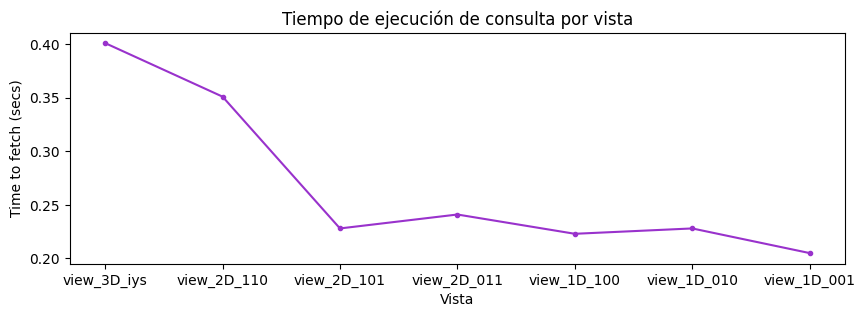

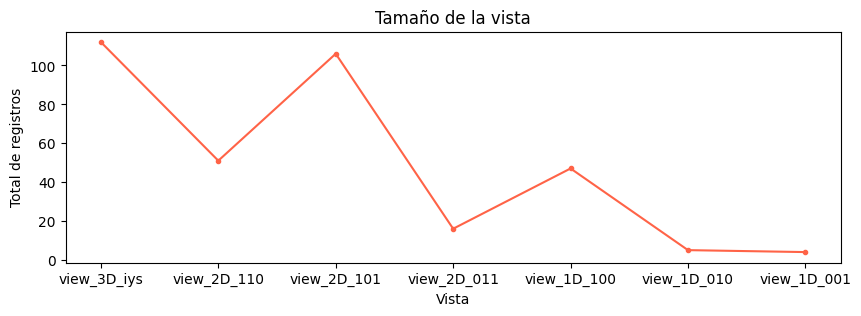

In [2]:
# Plot time to fetch

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.plot(views[['time_to_fetch']], marker='.', color='darkorchid',)
plt.xlabel('Vista')
plt.ylabel('Time to fetch (secs)')
plt.title('Tiempo de ejecución de consulta por vista')
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(views[['n_rows']], marker='.', color='tomato',)
plt.xlabel('Vista')
plt.ylabel('Total de registros')
plt.title('Tamaño de la vista')
plt.show()


# Costo del modelo de datos

Existe una relación lineal entre el número de tuplas y el el tiempo de ejecución
del query. Esta relación puede ser expresada como:

$$ T = m \cdot S + c $$

Donde $T$ es el tiempo de ejecución del query, $S$ es el número de tuplas y
$c$ es el costo de ejecutar el query cuando no hay tuplas. El valor de $m$ y
$c$ depende del query y del modelo de datos.

# Optimización de la latice de cubos

1. Deseamos minimizar el tiempo promedio de ejecución de los queries.
2. Estamos restringidos a materializar un número fijo de cuboides, independiente
   del espacio que ocupen (tenemos memoria limitada).


El costo del cubo de datos es el número de tuplas que se generan al
materializar.
El beneficio de materializar un cuboide es la reducción del costo por todas las
vistas "hijas" al materializar la vista en cuestión.

As;i, si una vista tiene un costo de materialización de 1000 tuplas, y tiene 4
vistas hijas, el beneficio de materializar la vista en cuestión es de 4000
tuplas.

In [3]:
# Calcula los beneficios de materializar las vistas
# Crea árbol de vistas
top_view = views[views['n_rows'] == views['n_rows'].max()]
max_val = top_view['n_rows'].values[0]

views['cost_reduction'] = max_val - views['n_rows']
views['benefit'] = views['cost_reduction'] * views['n_children']
views['benefit'].values[0]

second_view = views[['n_rows', 'n_children','cost_reduction', 'benefit']]
second_view

,n_rows,n_children,cost_reduction,benefit
view_3D_iys,112,7,0,0
view_2D_110,51,3,61,183
view_2D_101,106,3,6,18
view_2D_011,16,3,96,288
view_1D_100,47,1,65,65
view_1D_010,5,1,107,107
view_1D_001,4,1,108,108


In [4]:
top_view = second_view[second_view['benefit'] == second_view['benefit'].max()]
max_val = top_view['cost_reduction'].values[0]
max_val

views['cost_reduction']['view_1D_001'] = max_val - views['n_rows']['view_1D_001']
views['cost_reduction']['view_1D_010'] = max_val - views['n_rows']['view_1D_010']
views['benefit']['view_1D_001'] = views['cost_reduction']['view_1D_001'] * views['n_children']['view_1D_001']
views['benefit']['view_1D_010'] = views['cost_reduction']['view_1D_010'] * views['n_children']['view_1D_010']
views[['n_rows', 'n_children','cost_reduction', 'benefit']]



,n_rows,n_children,cost_reduction,benefit
view_3D_iys,112,7,0,0
view_2D_110,51,3,61,183
view_2D_101,106,3,6,18
view_2D_011,16,3,96,288
view_1D_100,47,1,65,65
view_1D_010,5,1,91,91
view_1D_001,4,1,92,92
